# Exploring Events data

### Importing necessary libraries

In [1]:
pip install pandas matplotlib seaborn


  Using cached pandas-1.5.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Using cached matplotlib-3.6.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Using cached seaborn-0.12.0-py3-none-any.whl (285 kB)
  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)
  Using cached numpy-1.23.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached fonttools-4.37.3-py3-none-any.whl (959 kB)
  Using cached contourpy-1.0.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (295 kB)
  Using cached Pillow-9.2.0-cp38-cp38-manylinux_2_28_x86_64.whl (3.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [3]:
events = pd.read_csv('../sources/events.csv')
registered = pd.read_csv('../sources/registered_in_events.csv')

### Exploring

In [4]:
events.shape

(177, 31)

In [5]:
registered.shape

(4888, 8)

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           177 non-null    int64  
 1   description                  175 non-null    object 
 2   title                        177 non-null    object 
 3   lang                         71 non-null     object 
 4   url                          177 non-null    object 
 5   banner                       174 non-null    object 
 6   capacity                     177 non-null    int64  
 7   starting_at                  177 non-null    object 
 8   ending_at                    177 non-null    object 
 9   status                       177 non-null    object 
 10  created_at                   177 non-null    object 
 11  updated_at                   177 non-null    object 
 12  author_id                    0 non-null      float64
 13  event_type_id       

In [7]:
registered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4888 non-null   int64  
 1   email        4888 non-null   object 
 2   created_at   4888 non-null   object 
 3   updated_at   4888 non-null   object 
 4   attendee_id  1058 non-null   float64
 5   event_id     4888 non-null   int64  
 6   status       4888 non-null   object 
 7   attended_at  0 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 305.6+ KB


In [8]:
events.sort_values(['created_at']).head(3)

,id,description,title,lang,url,banner,capacity,starting_at,ending_at,status,...,eventbrite_url,organization_id,published_at,eventbrite_sync_description,eventbrite_sync_status,online_event,sync_with_eventbrite,currency,slug,tags
1,35,¡Ven y crea el producto que enamore al cliente!,Crea un producto que enamore,NaN,https://www.eventbrite.com/e/crea-un-producto-...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,100,2020-10-14 16:30:00+00:00,2020-10-14 17:30:00+00:00,ACTIVE,...,https://www.eventbrite.com/e/crea-un-producto-...,4,2020-09-23 18:55:47+00:00,2020-10-14 07:30:36.116768+00:00,PERSISTED,True,False,USD,NaN,NaN
2,36,¡Lo han logrado! Nuestros estudiantes presenta...,GeekTALKS: Presentación de proyectos finales,NaN,https://www.eventbrite.com/e/geektalks-present...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,200,2020-10-16 19:00:00+00:00,2020-10-16 21:00:00+00:00,ACTIVE,...,https://www.eventbrite.com/e/geektalks-present...,4,2020-09-22 18:36:58+00:00,2020-10-16 07:30:52.632913+00:00,PERSISTED,True,False,USD,NaN,NaN
9,37,Preséntale al mundo un currrículum que logre u...,Cómo crear tu currículum con HTML y CSS,NaN,https://www.eventbrite.com/e/como-crear-tu-cur...,https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc....,200,2020-10-22 19:00:00+00:00,2020-10-22 20:00:00+00:00,ACTIVE,...,https://www.eventbrite.com/e/como-crear-tu-cur...,4,2020-10-07 22:12:40+00:00,2020-10-22 07:30:34.764812+00:00,PERSISTED,True,False,USD,NaN,NaN


We can see that the 'tags' column has started to be filled since April 2022.

In [9]:
#Let's create 2 functions to check the categories in categorical features

def countplot_features(df, feature):
    fig = plt.figure(figsize=(10,6))
    ax = sns.countplot(x=df[feature], order=df[feature].value_counts(ascending=False).index);

    abs_values = df[feature].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=30, ha='right')
    #plt.show()

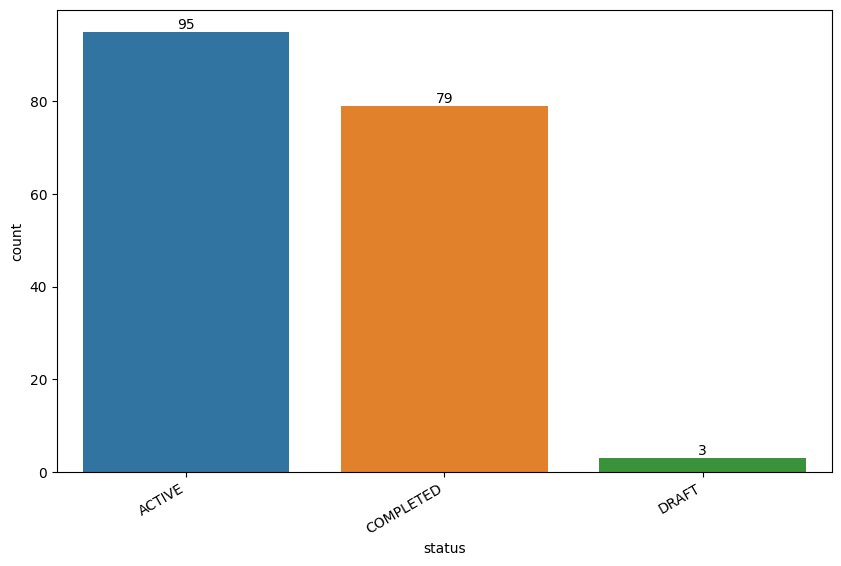

In [10]:
countplot_features(events,'status')

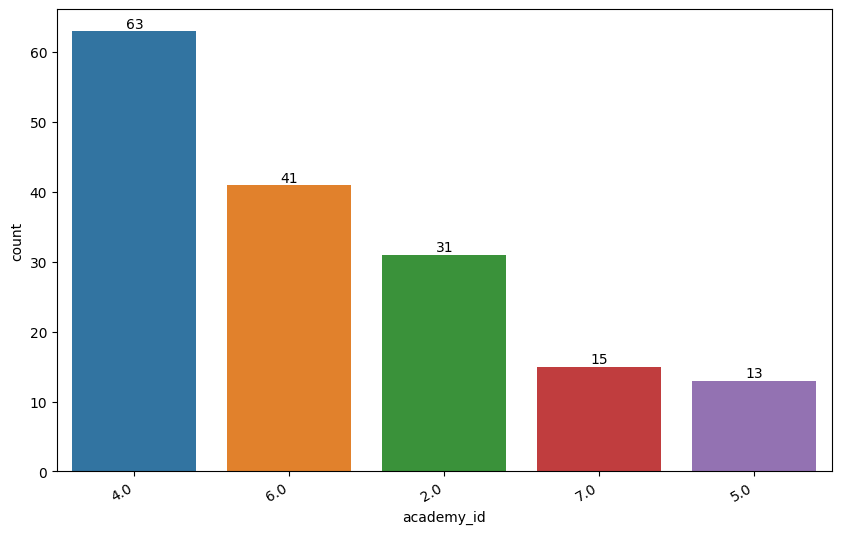

In [11]:
countplot_features(events,'academy_id')

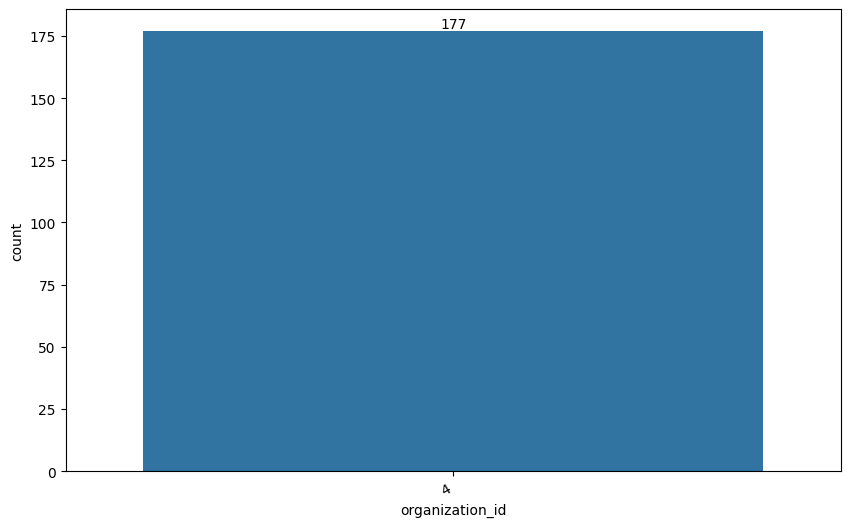

In [12]:
countplot_features(events,'organization_id')

**Dropping columns**

In [13]:
#Useless columns

TO_DROP_EVENTS = ['created_at','updated_at','organization_id']

TO_DROP_REGISTERED = ['id', 'created_at','updated_at','status']

#Drop useless columns in registered_in_events

registered.drop(TO_DROP_REGISTERED, axis=1, inplace=True)

In [14]:
#Drop useless columns in events

events.drop(TO_DROP_EVENTS, axis=1, inplace=True)

In [15]:
#Drop null columns in events
events.dropna(axis=1, how='all', inplace=True)

In [16]:
#Drop null columns in registered
registered.dropna(axis=1, how='all', inplace=True)

In [17]:
#Drop rows with test emails used for registration
registered = registered[registered["email"].str.contains("@4geeks") == False]

In [18]:
registered.shape

(4870, 3)

In [19]:
events.shape

(177, 25)

**Verifying amount of duplicates**

In [20]:
#See how many duplicated events
pd.options.display.max_rows = None
events['id'].duplicated().value_counts()

False    177
Name: id, dtype: int64

In [21]:
#See how many duplicated emails in registered people
pd.options.display.max_rows = None
registered['email'].duplicated().value_counts()

False    3741
True     1129
Name: email, dtype: int64

There are no duplicated events and there are 1129 duplicated emails in registered people, so they have gone to several events. Should NOT be eliminated. 

**Join datasets**

In [31]:
inner_merged = pd.merge(registered, events, left_on="event_id", right_on="id").drop('id', axis=1)
inner_merged.shape

(4870, 27)

**1. Events with more and less attendies and what tags do they have**

In [ ]:
#popular = inner_merged.sort_values(['job','count'],ascending=False).groupby('job').head(3)

In [ ]:
#popular2 = inner_merged.groupby(['event_id']).agg({'email':sum})

In [66]:
#top 20 events with more attendies
inner_merged.groupby(['event_id'])['email'].count().sort_values(ascending=False).head(20)

event_id
142    439
187    174
413    112
430    110
213    107
258     93
412     82
364     79
423     75
272     72
405     72
418     71
321     69
359     68
135     67
478     66
268     65
218     64
182     60
189     60
Name: email, dtype: int64

In [63]:
#top 20 events with less attendies
inner_merged.groupby(['event_id'])['email'].count().sort_values(ascending=True).head(20)

event_id
483    1
350    1
207    1
217    1
259    1
368    1
474    2
482    2
417    3
339    3
435    4
472    4
473    4
201    4
481    4
366    4
202    5
420    5
469    5
367    6
Name: email, dtype: int64

**2. Tags with more attendies**

**3. Academy with more attendies, what events and what tags**

**4. Events with attendies that bought after the event (won_at date is after the event date)**

**5. Where do attendies come from, by tag and academy_id.